# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1- The frozen Binomial distribution

The binomial probability distribution can be used to calculate the probability of a certain number of ‘successes’ in n trials.

For example, if 100 photons arrive at a sensor with a quantum efficiency (QE) of 0.75, what is the likelihood that 75 will be detected? We can answer this question using the binomial probability mass function:

$P(x) =  \frac{n!}{x!(n-x)!} p^xq^{n-x}$

where:

$P(75)$ = probability of exactly $x$ successes - what we are solving for<br/>
$n$ = 100 (number of trials)<br/>
$p$ = 0.75 (probability of success) <br/>
$q$ = 0.25 (probability of failure, or 1-p)$

so, $P(75) =  \frac{100!}{75!(25)!} 0.75^{75}0.25^{100-25}$

### Create the "frozen distribution"

Below, I create a "frozen" distribution - in this case, a binomial probability mass function.

Read more about it here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [3]:
import scipy.stats as stats

p = 0.75 # probability of a "success" - in this case that a photon is detected
n = 100 # number of chances at success - in this case, number of photons that hit the sensor

# Create a fozen binomial distribution with paramters q and p
qe_frozen_binomial_dist = stats.binom(n,p)

print(f'Our frozen distribution is of type: {type(qe_frozen_binomial_dist)}')

Our frozen distribution is of type: <class 'scipy.stats._distn_infrastructure.rv_discrete_frozen'>


Given $n=100$ and $p=0.75$, calculate the probability that 75 photons will be detected.

In [4]:

# Frozen distirbution qe_frozen_binomial_dist was created
# using the parameters n=100 and p=0.75.
# Now, we can use it to evaluate for different values of x.

# The method is "<rv_discrete_frozen>.pmf(x)"
a_probability = qe_frozen_binomial_dist.pmf(75)
print(f'The probability of detecting 75 photons given n=100 and p=0.75 is {a_probability:.3f}.')

The probability of detecting 75 photons given n=100 and p=0.75 is 0.092.


We can do this for a range of values, too.

In [5]:
num_photons = np.arange(65,75)
y_probabilities = qe_frozen_binomial_dist.pmf(num_photons)

print('The type of y_probabilities is: {type(y_probabilities)}')
print('The values of y_probabilities are:')

for idx, a_prob in enumerate(y_probabilities):
  print(f'p({num_photons[idx]})={a_prob:.3f}')


The type of y_probabilities is: {type(y_probabilities)}
The values of y_probabilities are:
p(65)=0.007
p(66)=0.011
p(67)=0.017
p(68)=0.025
p(69)=0.034
p(70)=0.046
p(71)=0.058
p(72)=0.070
p(73)=0.081
p(74)=0.088


## Plot p(x) across a range to visualize the probability mass function.

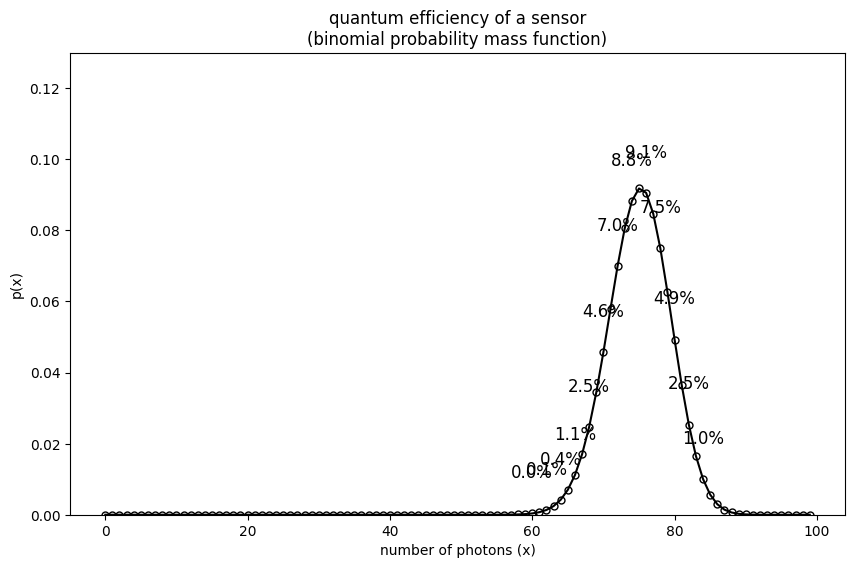

In [6]:
num_photons = np.arange(0,100)
y_probabilities = qe_frozen_binomial_dist.pmf(num_photons)

plt.figure(figsize=(10,6))
plt.plot(num_photons, y_probabilities, '-ko', markerfacecolor='none',
         ms=5, label='binom pmf')

# Add text labels
for i in np.arange(60,85,2):
  plt.text(num_photons[i], y_probabilities[i]+.01,
           f'{100.0*y_probabilities[i]:.1f}%',size=12,ha='center')

plt.title('quantum efficiency of a sensor\n(binomial probability mass function)')
plt.xlabel('number of photons (x)')
plt.ylabel('p(x)')
plt.ylim((0, .13))
plt.show()




---


#2. The Poisson probability distribution.

The Poisson probability distribution can be used to calculate the probability of a certain number of ‘successes’ in an interval given a known average.

For example, if 100 photons of a specific wavelength fall on a medium wavelength cone, an average of 20 will be absorbed. What is the probability that 10 are absorbed?  What about just one?

The quantum efficiency of photoactivation measures the probability that the adsorption of a photon initiates photoactivation. This probability is defined as the ratio between the number of photoactivated molecules and the number of molecules that absorbed a photon. Quantum efficiency of visual pigments is wavelength-independent at ~ 0.7 in the spectrum of visible light whereas it falls to about 0.25 for wavelengths shorter than 300 nm (73). This suggests that every absorbed photon in the visible range can activate rhodopsin equally well. The quantum efficiency of 0.7 is very similar across all visual pigments. This high efficiency seems to be a common feature of most vertebrate visual pigments.



### Given the parameters of a Poisson distribution, calculate a probability.

The function below, `poisson.pmf(k, lam)` accepts an integer k (e.g. a potential observation, the lambda paramter that described the poisson distribution, and returns a probability.


The following is based on data from "The First Steps in Seeing" by R.W. Rodieck...

Imaging that you are looking at Polaris (the North Star) at night.

* It takes about 100 ms for a cone to return to its resting potential after it has absorbed a photon.
*   In that time, the total "flux density" of photons across all wavelengths that will fall on an area 1 $mm^2$ in size is approximately 18,000 photons.
* However, only a fraction will hit the eye, and of these only a fraction are in the visible range of wavelengths.
* About 280 photons/$mm^2$ within the visible range will actually reach the earth's surface.
* The pupil has an area of about 40 $mm^2$ at night.
* Some of the photons will be absorbed by the corners of your eyes, about 2.5% are reflected at the surface of the eye and 9% are reflected by the cornea. Only about 9,400 in the visible range will enter your eye every 100 ms.
* Many of these 9,400 will be scattered or absorbed by the macula, or lens.  Only about 5,500 will reach the fovea in the 100 ms window.
* Of those 5,500 photons, only a fraction will hit a cone.  Of that fraction, only 50% of those photons will be absorbed, and only about 67% of those absorbed photons will be transduced into a chemical electrical signal. Ultimately, only about 700 photons will be transduced in 100 ms, which is about 0.6% of the total number in the visible range that encountered the cornea.


**To summarize:** To summarize:  of 9,400 photons that entered your eye within the 100 ms integration window, only 10-15 photons will be transduced by a cone in the center of your fovea.  These 10-15 cones are sufficient for the foveal perception of polaris at night.

In [13]:
# Over 100ms,
# Cones received 170 photons from Polaris.

k = 1 #np.arange(0, 50, 1)
lam = 15  # on average, 15 are absorbed over the interval

prob = stats.poisson.pmf(k, lam)

print(f'We know that 9,400 photons of a particular wavelength fall on a cone, {lam} are absorbed on average.')
print(f'According to a Poison distribution, this means there is a probability of {prob:.2f} that {k} will be absorbed.')
print(f'...or a {100 * prob:.2f} chance.')

We know that 9,400 photons of a particular wavelength fall on a cone, 15 are absorbed on average.
According to a Poison distribution, this means there is a probability of 0.00 that 1 will be absorbed.
...or a 0.00 chance.


### You can also do this for many values of k at a time.

In [15]:

list_of_k = np.arange(0, 30, 1) # How many are aborbed? Simulate k from 10 to 20 in intervals of 1
lam = 15

list_of_probs = stats.poisson.pmf(list_of_k, lam);

for i, prob in enumerate(list_of_probs):
  print(f'Probability of {list_of_k[i]} occurances: {prob:.6f}')


Probability of 0 occurances: 0.000000
Probability of 1 occurances: 0.000005
Probability of 2 occurances: 0.000034
Probability of 3 occurances: 0.000172
Probability of 4 occurances: 0.000645
Probability of 5 occurances: 0.001936
Probability of 6 occurances: 0.004839
Probability of 7 occurances: 0.010370
Probability of 8 occurances: 0.019444
Probability of 9 occurances: 0.032407
Probability of 10 occurances: 0.048611
Probability of 11 occurances: 0.066287
Probability of 12 occurances: 0.082859
Probability of 13 occurances: 0.095607
Probability of 14 occurances: 0.102436
Probability of 15 occurances: 0.102436
Probability of 16 occurances: 0.096034
Probability of 17 occurances: 0.084736
Probability of 18 occurances: 0.070613
Probability of 19 occurances: 0.055747
Probability of 20 occurances: 0.041810
Probability of 21 occurances: 0.029865
Probability of 22 occurances: 0.020362
Probability of 23 occurances: 0.013280
Probability of 24 occurances: 0.008300
Probability of 25 occurances: 0.004

### Plot k from 0 to 100

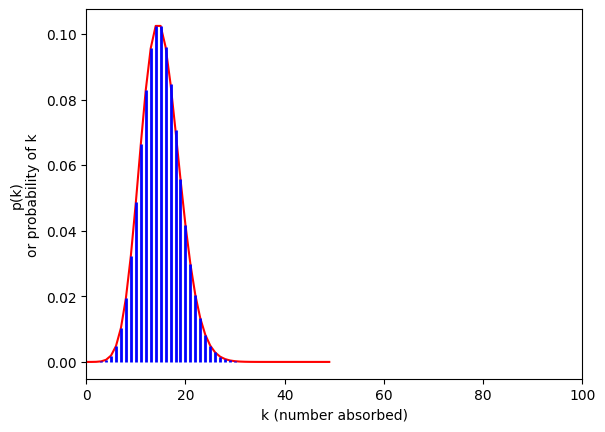

In [17]:
# Plot!

list_of_k = np.arange(0, 50, 1) # How many are aborbed? Simulate k from 10 to 20 in intervals of 1
lam = 15

list_of_probs = stats.poisson.pmf(list_of_k, lam)

plt.plot(list_of_k, list_of_probs, 'r') # the red line
plt.vlines(list_of_k, 0, list_of_probs, colors='b', lw=2) # the blue vertical lines

plt.xlabel('k (number absorbed)')
plt.ylabel('p(k)\nor probability of k')
plt.xlim([0,100])
plt.show()

### Observe the way that the distribution changes as lambda changes

In this case, lambda is the number of photons typically absorbed

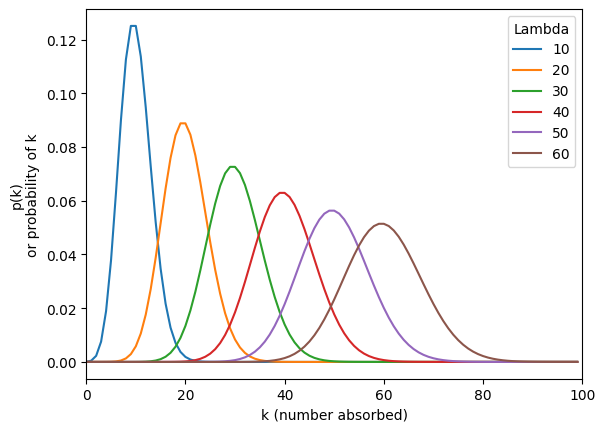

In [18]:
k = np.arange(0, 100, 1) # How many are absorbed? Simulate k from 0 to 100 in intervals of 0.1

for lam in np.arange(10,70,10): # on average, lam are absorbed over the interval

  h = list_of_probs = stats.poisson.pmf(k, lam)
  plt.plot(k, list_of_probs,label=lam) # the red line

plt.xlabel('k (number absorbed)')
plt.ylabel('p(k)\nor probability of k')
plt.legend(title="Lambda")
plt.xlim([0,100])
plt.show()